In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression

startDate = datetime(2017,3,1)
endDate = datetime(2021,12,1)

#clean data functions
sector_dict={
            'S&P 500 Materials Sector GICS Level 1 Index': 'material',
            'S&P 500 Energy Sector GICS Level 1 Index':	'energy',
            'S&P 500 Industrials Sector GICS Level 1 Index':'industrial',
            'S&P 500 Consumer Discretionary Sector GICS Level 1 Index':'consumer_discretionary',
            'S&P 500 Consumer Staples Sector GICS Level 1 Index':'consumer_staple',
            'S&P 500 Health Care Sector GICS Level 1 Index':'health_care',
            'S&P 500 Information Technology Sector GICS Level 1 Index':'IT',
            'S&P 500 Financials Sector GICS Level 1 Index': 'financial',
            'S&P 500 Real Estate Sector GICS Level 1 Index': 'real_estate',
            'S&P 500 Utilities Sector GICS Level 1 Index': 'utility',
            'S&P 500 Communication Services Sector GICS Level 1 Index':'telecom'
            }

sector_list = ['energy','material','industrial','consumer_discretionary','consumer_staple','health_care','financial','IT','telecom','utility','real_estate']
factor_list=['PE','PB','EV2Sales','EV2EBIT','EV2EBITDA','DIV_Y','OM','PM','ROA','ROE']

def clean_fdmt_data(df):
    df=df.drop(columns=['Unnamed: 0'])
    df=df.rename(columns={'3 Months Ending':'Dates'})
    df=df.set_index('Dates')
    df=df.rename(columns=sector_dict)
    df=df.truncate(after=endDate).fillna(method='ffill')
    return(df)

def factor_neutralize(df):
    df=df.dropna()
    mean = df.mean(axis=1) 
    std = df.std(axis=1)
    return(df.sub(mean,axis=0).div(std,axis=0))

#import&clean Data
#PE ratio
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/PE Ratio.xlsx',parse_dates=['3 Months Ending'])
PE_df=clean_fdmt_data(df)
PE_neutral=factor_neutralize(PE_df).truncate(before=startDate,after=endDate).fillna(method='ffill')


#PB ratio
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/PB Ratio.xlsx',parse_dates=['3 Months Ending'])
PB_df=clean_fdmt_data(df)
PB_neutral=factor_neutralize(PB_df).truncate(before=startDate,after=endDate).fillna(method='ffill')


#EV2Sales
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/EV2Sales.xlsx',parse_dates=['3 Months Ending'])
EV2Sales_df=clean_fdmt_data(df)
EV2Sales_neutral=factor_neutralize(EV2Sales_df).truncate(before=startDate,after=endDate).fillna(method='ffill')

#EV2EBIT
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/EV2EBIT.xlsx',parse_dates=['3 Months Ending'])
EV2EBIT_df=clean_fdmt_data(df)
EV2EBIT_neutral=factor_neutralize(EV2EBIT_df).truncate(before=startDate,after=endDate).fillna(method='ffill')

#EV2EBITDA
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/EV2EBITDA.xlsx',parse_dates=['3 Months Ending'])
EV2EBITDA_df=clean_fdmt_data(df)
EV2EBITDA_neutral=factor_neutralize(EV2EBITDA_df).truncate(before=startDate,after=endDate).fillna(method='ffill')

#Dividend Yield
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/Dividend Yield.xlsx',parse_dates=['3 Months Ending'])
DIV_Y_df=clean_fdmt_data(df)
DIV_Y_neutral=factor_neutralize(DIV_Y_df).truncate(before=startDate,after=endDate).fillna(method='ffill')

#Gross Margin
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/Gross Margin.xlsx',parse_dates=['3 Months Ending'])
GM_df=clean_fdmt_data(df)
GM_neutral=factor_neutralize(GM_df).truncate(before=startDate,after=endDate).fillna(method='ffill')

#Operating Margin
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/operatingmargin.xlsx',parse_dates=['3 Months Ending'])
OM_df=clean_fdmt_data(df)
OM_neutral=factor_neutralize(OM_df).truncate(before=startDate,after=endDate).fillna(method='ffill')

#profit Margin
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/profit margin.xlsx',parse_dates=['3 Months Ending'])
PM_df=clean_fdmt_data(df)
PM_neutral=factor_neutralize(PM_df).truncate(before=startDate,after=endDate).fillna(method='ffill')

#return on asset
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/return on asset.xlsx',parse_dates=['3 Months Ending'])
ROA_df=clean_fdmt_data(df)
ROA_neutral=factor_neutralize(ROA_df).truncate(before=startDate,after=endDate).fillna(method='ffill')

#return on equity
df=pd.read_excel('/Users/JackRitian/Desktop/sector rotation/data/Fundamentals/return on equity.xlsx',parse_dates=['3 Months Ending'])
ROE_df=clean_fdmt_data(df)
ROE_neutral=factor_neutralize(ROE_df).truncate(before=startDate,after=endDate).fillna(method='ffill')

In [2]:
factor_df_list=[PE_neutral,PB_neutral,EV2Sales_neutral,EV2EBIT_neutral,EV2EBITDA_neutral,DIV_Y_neutral,OM_neutral,PM_neutral,ROA_neutral,ROE_neutral]
factor_list=['PE','PB','EV2Sales','EV2EBIT','EV2EBITDA','DIV_Y','OM','PM','ROA','ROE']

The Coefficients is 
 0.033315669544144416


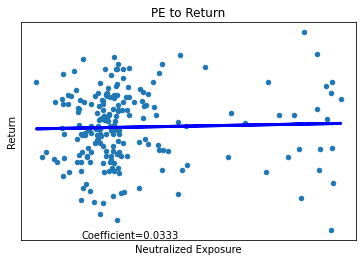

The Coefficients is 
 0.17633899337159226


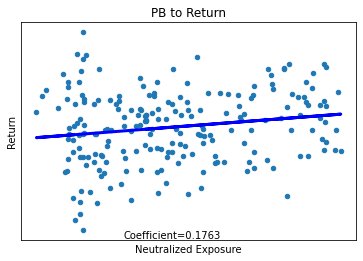

The Coefficients is 
 0.03695702051412651


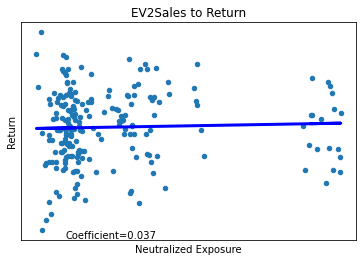

The Coefficients is 
 -0.05074000339083042


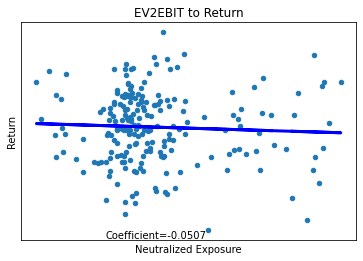

The Coefficients is 
 0.12353847970185816


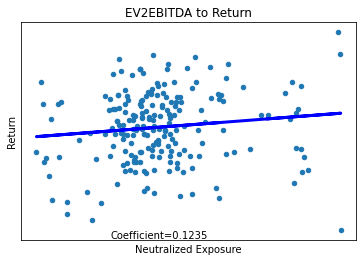

The Coefficients is 
 -0.19864091760048364


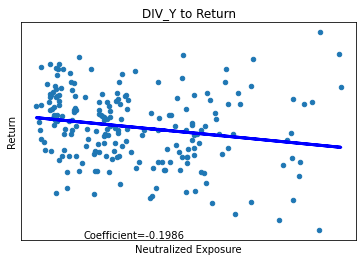

The Coefficients is 
 0.10037632649451843


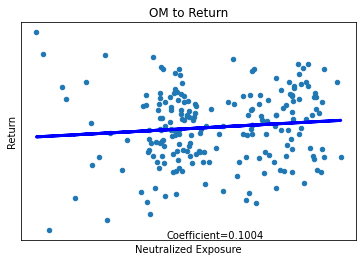

The Coefficients is 
 0.09222506313669997


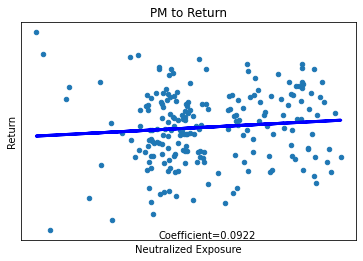

The Coefficients is 
 0.12980874766924683


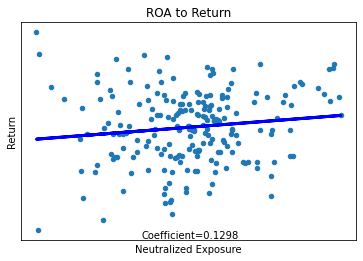

The Coefficients is 
 0.12351461299640742


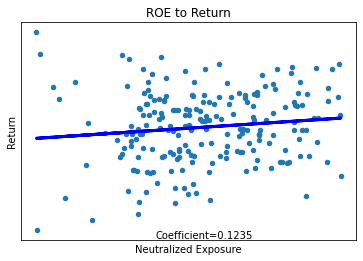

In [3]:
'''
---------------------------------------------------- Return to Factor Exposure------------------------------------------------------------------------------------
'''

sector_index=pd.read_csv('/Users/JackRitian/Desktop/sector rotation/data/index data/sector_index.csv',parse_dates=['Date'])
sector_index=sector_index.set_index('Date').truncate(before=startDate,after=endDate)
quarterly_index_rtn=sector_index.resample("Q").last().pct_change().shift(-1).dropna()
neutralize_rtn = factor_neutralize(quarterly_index_rtn)

for i in range(len(factor_list)):
    df=factor_df_list[i]
    factor_name=factor_list[i]
    exposures = []
    returns = []
    for sector in sector_list:
        for exposure in df[sector]:
            exposures.append(exposure)
        for rtn in neutralize_rtn[sector]:
            returns.append(rtn)
    exp_return=pd.DataFrame({'Return':returns,'Neutralized Exposure':exposures})
    
    X_train = pd.DataFrame({'Neutralized Exposure':exposures}).to_numpy()
    Y_train = pd.DataFrame({'Return':returns}).to_numpy()
    
    # Create linear regression object
    regr = LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, Y_train)

    # Make predictions using the testing set
    Y_pred = regr.predict(X_train)

    # The coefficients
    cof=regr.coef_[0][0]
    print("The Coefficients is \n", cof)

    # Plot outputs
    exp_return.plot.scatter(x='Neutralized Exposure',y='Return')
    plt.plot(X_train, Y_pred, color="blue", linewidth=3)
    plt.xticks(())
    plt.yticks(())
    plt.title(factor_name+' to Return')
    plt.text(0,-3,'Coefficient='+str(np.round(cof,decimals=4)),horizontalalignment='center',verticalalignment='bottom')
    
    plt.savefig('/Users/JackRitian/Desktop/sector rotation/photos/Fundamental factor scatter/r'+factor_name+'.png')
    
    plt.show()

    



In [5]:
#get sector exposure to return

def sector_sig(sector):
    for i in range(0,len(factor_list)):
        df = factor_df_list[i]
        factor = factor_list[i]
        if i == 0:   
            sector_exposure = df[sector].to_frame().rename(columns={sector:factor})
        else:
            sector_exposure[factor] = df[sector].to_list()
    
    sector_exposure['Return'] = neutralize_rtn[sector].to_list()
    sig =[]
    for rtn in sector_exposure['Return']:
        if rtn > 0:
            sig.append(1)
        else:
            sig.append(0)
    sector_exposure['sig'] = sig
    
    return(sector_exposure)
    

In [16]:
def split_set(df):
    X_train = df[factor_list]['2017-03-31':'2019-09-30'].to_numpy()
    Y_train = df['sig']['2017-03-31':'2019-09-30'].to_numpy()
    rtn_train = df['Return']['2017-03-31':'2019-09-30'].to_numpy()
    X_valid = df[factor_list]['2019-09-30':'2020-09-30'].to_numpy() 
    Y_valid = df['sig']['2019-09-30':'2020-09-30'].to_numpy()  
    rtn_valid = df['Return']['2019-09-30':'2020-09-30'].to_numpy() 
    X_test = df[factor_list]['2020-09-30':].to_numpy() 
    Y_test = df['sig']['2020-09-30':].to_numpy()  
    rtn_test = df['Return']['2020-09-30':].to_numpy() 
    
    return X_train, Y_train, rtn_train, X_valid, Y_valid, rtn_valid, X_test, Y_test, rtn_test

for sector in sector_list:
    df = sector_sig(sector)
    X_train, Y_train, rtn_train, X_valid, Y_valid, rtn_valid, X_test, Y_test, rtn_test = split_set(df)
    
    
    if sector == sector_list[0]:
        X_train_total = X_train
        Y_train_total = Y_train
        rtn_train_total = rtn_train
        X_valid_total = X_valid
        Y_valid_total = Y_valid
        rtn_valid_total = rtn_valid
        X_test_total = X_test
        Y_test_total = Y_test
        rtn_test_total = rtn_test
    else:
        X_train_total = np.vstack((X_train_total, X_train))
        Y_train_total = np.hstack((Y_train_total,Y_train))
        rtn_train_total = np.hstack((rtn_train_total,rtn_train))
        X_valid_total = np.vstack((X_valid_total,X_valid))
        Y_valid_total = np.hstack((Y_valid_total,Y_valid))
        rtn_valid_total = np.hstack((rtn_valid_total,rtn_valid))
        X_test_total = np.vstack((X_test_total,X_test))
        Y_test_total = np.hstack((Y_test_total,Y_test))
        rtn_test_total = np.hstack((rtn_test_total,rtn_test))

In [17]:
Total_up_NO = 0
Total_down_NO = 0

for num in Y_train_total:
    if num >0:
        Total_up_NO += 1
    else:
        Total_down_NO +=1

print("There are",Total_up_NO,'possitive samples and', Total_down_NO,'negative samples in the training set ')

There are 61 possitive samples and 60 negative samples in the training set 


In [18]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,max_iter=1000,hidden_layer_sizes=(5,5), random_state=1)
clf.fit(X_train_total, Y_train_total)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 5), max_iter=1000,
              random_state=1, solver='lbfgs')

In [19]:
test_scores=[]
alpha_list=['3','2.5','2','1.5','1','0.5','0.25']
n_list=[5,6,7,8,9,10,11,12,13,14,15]
for alpha in alpha_list:
    valid_score_list=[]
    for n in n_list:
        clf = MLPClassifier(solver='lbfgs', alpha=float(alpha),max_iter=10000,hidden_layer_sizes=(n,n), random_state=1)
        clf.fit(X_train_total,Y_train_total)
        valid_score=clf.score(X_valid_total, Y_valid_total)
        valid_score_list.append(valid_score)
    score_dict = {alpha+'valid':valid_score_list}
    test_scores.append(score_dict)


In [20]:
score_dict=test_scores[0]
print(type(score_dict))
for i in range(1,len(test_scores)):
    score_dict.update(test_scores[i])
score_df = pd.DataFrame(score_dict)
score_df['N']=n_list
score_df = score_df.set_index('N')
#score_df.to_csv('/Users/Jackritian/Desktop/sector rotation/hyperparameter_tuning2.csv')
print(score_df)

<class 'dict'>
      3valid  2.5valid    2valid  1.5valid    1valid  0.5valid  0.25valid
N                                                                        
5   0.490909  0.454545  0.490909  0.563636  0.618182  0.581818   0.618182
6   0.509091  0.545455  0.454545  0.490909  0.509091  0.490909   0.472727
7   0.545455  0.527273  0.563636  0.509091  0.472727  0.509091   0.581818
8   0.509091  0.472727  0.545455  0.509091  0.509091  0.636364   0.600000
9   0.527273  0.490909  0.472727  0.527273  0.563636  0.563636   0.545455
10  0.545455  0.527273  0.527273  0.527273  0.509091  0.509091   0.527273
11  0.527273  0.581818  0.509091  0.509091  0.472727  0.654545   0.581818
12  0.545455  0.545455  0.563636  0.509091  0.490909  0.509091   0.636364
13  0.527273  0.472727  0.545455  0.490909  0.563636  0.600000   0.545455
14  0.490909  0.509091  0.563636  0.527273  0.545455  0.527273   0.490909
15  0.472727  0.509091  0.509091  0.509091  0.454545  0.490909   0.563636


In [21]:
clf = MLPClassifier(solver='lbfgs', alpha=float(0.5),max_iter=10000,hidden_layer_sizes=(5,5), random_state=1)
clf.fit(X_train_total,Y_train_total)

MLPClassifier(alpha=0.5, hidden_layer_sizes=(5, 5), max_iter=10000,
              random_state=1, solver='lbfgs')

In [22]:
test_y_pred=clf.predict(X_test_total)
clf.score(X_test_total,Y_test_total)

0.6363636363636364

In [23]:
test_up_NO = 0
test_down_NO = 0
for num in Y_test_total:
    if num >0:
        test_up_NO += 1
    else:
        test_down_NO +=1

print("There are",test_up_NO,'possitive samples and', test_down_NO,'negative samples in the test set ')

There are 27 possitive samples and 28 negative samples in the test set 


In [24]:
test_pred_up_NO = 0
test_pred_down_NO = 0

for num in test_y_pred:
    if num >0:

        test_pred_up_NO += 1
    else:
        test_pred_down_NO +=1

print("There are",test_pred_up_NO,'possitive samples and', test_pred_down_NO,'negative samples in the test prediction.')

There are 37 possitive samples and 18 negative samples in the test prediction.


In [25]:
total_up_correct = 0
total_down_correct = 0

for i in range(len(Y_test_total)):
    if test_y_pred[i] >0:
        if test_y_pred[i] == Y_test_total[i]:
            total_up_correct += 1
    if test_y_pred[i] ==0:
        if test_y_pred[i] == Y_test_total[i]:
            total_down_correct +=1

up_correct_rate = total_up_correct/test_pred_up_NO  
down_correct_rate = total_down_correct/test_pred_down_NO
print('On Test Set')
print('There are ',total_up_correct,'correct up prediction')
print('There are ',total_down_correct,'correct down prediction')
print('The Correct Rate on possitive prediction is',up_correct_rate)
print('The Correct Rate on negative prediction is',down_correct_rate)

On Test Set
There are  22 correct up prediction
There are  13 correct down prediction
The Correct Rate on possitive prediction is 0.5945945945945946
The Correct Rate on negative prediction is 0.7222222222222222


In [27]:
for sector in sector_list:
    df = sector_sig(sector)
    test_input = df[factor_list]['2020-09-30':].to_numpy() 
    test_output = []
    probs=clf.predict_proba(test_input)
    for prob in clf.predict_proba(test_input):
        test_output.append(prob[1])
    if sector == sector_list[0]:
        sig_dict = {sector:test_output}
    else:
        sig_dict.update({sector:test_output})
sig_df=pd.DataFrame(sig_dict)

test_rtn = quarterly_index_rtn['2020-09-30':]
Dates=test_rtn.index.to_list()
sig_df['Date']=Dates
sig_df = sig_df.set_index('Date')

In [28]:
sig_rank_df = sig_df.rank(axis=1, ascending=False).astype(int)
def get_top_bot(int):
    if int >= 9:
        return -1
    elif int <= 3:
        return 1
    else:
        return 0
    
for date in Dates:
    for sector in sector_list:
        sig_rank_df.loc[date,sector] = get_top_bot(sig_rank_df[sector][date])

The Sharpe Ratio is  2.2075938159933624
0.3381188092348534


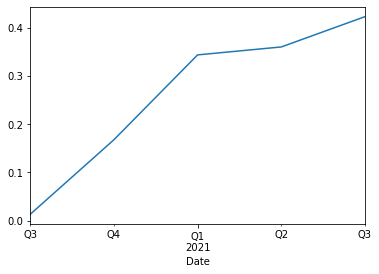

In [29]:
rtn_df = sig_rank_df*test_rtn

rtn = rtn_df.sum(axis=1)
mean_rtn = rtn.mean()*4
std_rtn = rtn.std()*4**0.5
SR = mean_rtn/std_rtn

print('The Sharpe Ratio is ',SR)
rtn.cumsum().plot()
print(mean_rtn)
plt.savefig('/Users/JackRitian/Desktop/sector rotation/photos/trade_on_model.png')